**<h3>BERT Model for sentiment analysis FYP</h3>**



In [1]:
import torch
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

1
NVIDIA GeForce GTX 1650


In [2]:
import torch.version


torch.version.cuda

'12.4'

In [2]:
import random
import numpy as np

torch.cuda.empty_cache()
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.cuda.manual_seed_all(42)

random.seed(42)
np.random.seed(42)


In [3]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AdamW
from sklearn.metrics import classification_report , accuracy_score

c:\Users\airul hafiq\Desktop\DataPreprocessing\DataPreprocessing\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Load the dataset
#excel = pd.read_excel('/content/fb scrape_translated_merged_Labeled.xlsx')
#excel.to_csv('fb_scrape_translated_merged_Labeled.csv', index=False)
data = pd.read_csv('C:/Users/airul hafiq/Desktop/DataPreprocessing/DataPreprocessing/Model/fb+reddit.csv')

# Display the first few rows
print(data.head())

                 Name                                            comment  \
0         Azmin Ahmad  Syed Mohd Saidi is not a smuggling.But leakage...   
1        Syefry Moniz  Syed Mohd Saidi mcm in Sabah and Sarawak is no...   
2             Yuz Ron     The agency is useful for the day of the parade   
3  Suhaimi Abd Rahman  Syed Mohd Saidi Species did not read this… .sp...   
4   Purba Simpuh Ipoh  Syed Mohd Saidi .The government is for the bes...   

  Sentiment  
0   Neutral  
1  Positive  
2  Positive  
3   Neutral  
4  Positive  


In [5]:
# Map sentiment labels to numerical values
label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
data['label'] = data['Sentiment'].map(label_mapping)

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


In [6]:
# Ensure all entries in the 'comment' column are strings
data['comment'] = data['comment'].fillna('').astype(str)

# Tokenize the 'comment' column
tokens = tokenizer(
    data['comment'].tolist(),
    max_length=128,   # Set the max length based on your data, here it’s capped at 128
    padding=True,
    truncation=True,
    return_tensors="pt"
)

In [7]:
X = tokens['input_ids']   # Tokenized comment texts
X_attention_masks = tokens['attention_mask']
y = torch.tensor(data['label'].values)   # Labels

# Use 80% for training and 20% for testing
train_inputs, test_inputs, train_masks, test_masks, train_labels, test_labels = train_test_split(
    X, X_attention_masks, y, test_size=0.1, random_state=42
)


In [8]:
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler

# Create TensorDatasets
train_data = TensorDataset(train_inputs, train_masks, train_labels)
test_data = TensorDataset(test_inputs, test_masks, test_labels)

# DataLoaders
train_dataloader = DataLoader(train_data, sampler=RandomSampler(train_data), batch_size=4)
test_dataloader = DataLoader(test_data, sampler=SequentialSampler(test_data), batch_size=4)

###ERROR####

In [9]:
# import torch
# print(torch.__version__)

In [10]:
# import sys  # Import the sys module to access system-specific parameters and functions

# # Print the Python version to the console
# print("Python version")

# # Use the sys.version attribute to get the Python version and print it
# print(sys.version)

# # Print information about the Python version
# print("Version info.")

# # Use the sys.version_info attribute to get detailed version information and print it
# print(sys.version_info)

In [11]:
# Limit GPU memory usage to 60% of the total memory
# torch.cuda.set_per_process_memory_fraction(0.6, device=0)

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
device = torch.device('cuda') #if torch.cuda.is_available() else 'cpu')
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [12]:
from torch.optim import AdamW
optimizer = AdamW(model.parameters(), lr=1e-5) 

In [13]:
# print(torch.version.cuda)

In [14]:
# import torch
# print(torch.cuda.is_available())
# print(torch.cuda.get_device_name(0))


In [15]:
from torch.nn import CrossEntropyLoss

epochs = 3

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        b_input_ids, b_input_mask, b_labels = [t.to(device) for t in batch]

        model.zero_grad()

        outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1} - Loss: {total_loss / len(train_dataloader)}")


Epoch 1 - Loss: 0.6334638905669883
Epoch 2 - Loss: 0.3315914315865476
Epoch 3 - Loss: 0.18924393621892507


In [16]:
model.eval()
predictions, true_labels = [], []

for batch in test_dataloader:
    b_input_ids, b_input_mask, b_labels = [t.to(device) for t in batch]

    with torch.no_grad():
        outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask)

    logits = outputs.logits
    predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
    true_labels.extend(b_labels.cpu().numpy())

# Calculate and display the accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
print(classification_report(true_labels, predictions, target_names=['negative', 'neutral', 'positive']))


Accuracy: 86.79%
              precision    recall  f1-score   support

    negative       0.74      0.84      0.79       173
     neutral       0.95      0.89      0.91       412
    positive       0.85      0.86      0.86       301

    accuracy                           0.87       886
   macro avg       0.85      0.86      0.85       886
weighted avg       0.87      0.87      0.87       886



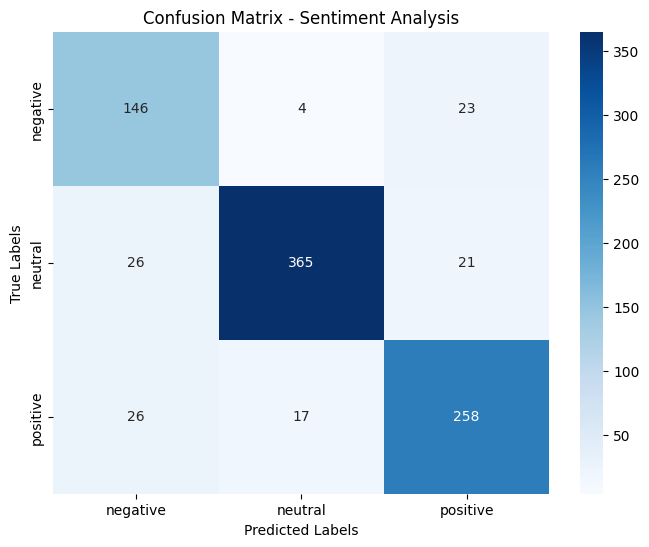

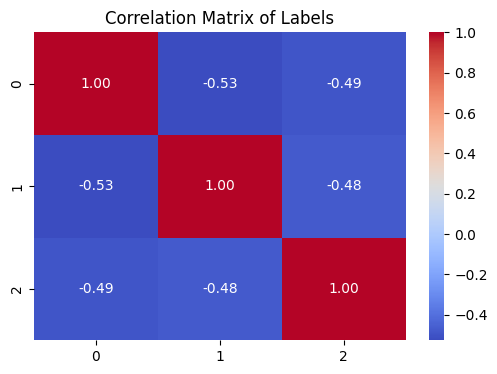

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Convert confusion matrix to a DataFrame for easier visualization
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['negative', 'neutral', 'positive'], 
                              columns=['negative', 'neutral', 'positive'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix - Sentiment Analysis")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate and display the correlation matrix
# (for classification problems, a confusion matrix often serves a similar purpose)
corr_matrix = pd.DataFrame(conf_matrix).corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Labels")
plt.show()


In [18]:
model.save_pretrained('bert_sentiment_VADER_model_adamW901043')
tokenizer.save_pretrained('bert_sentiment_VADER_model_adamW901043')

('bert_sentiment_VADER_model_adamW901043\\tokenizer_config.json',
 'bert_sentiment_VADER_model_adamW901043\\special_tokens_map.json',
 'bert_sentiment_VADER_model_adamW901043\\vocab.txt',
 'bert_sentiment_VADER_model_adamW901043\\added_tokens.json')

<h2>EXAMPLE</h2>

In [19]:
# from transformers import BertTokenizer, BertForSequenceClassification
# import torch

In [20]:

# # Load the model and tokenizer
# model_path = "C:/Users/airul hafiq/Desktop/DataPreprocessing/DataPreprocessing/Model/bert_sentiment_model_adam44"
# model = BertForSequenceClassification.from_pretrained(model_path)
# tokenizer = BertTokenizer.from_pretrained(model_path)

In [21]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model.to(device)

In [ ]:
# # Add this function to the end of your script
# def predict_sentiment(text, model, tokenizer, device):
#     """
#     Predict the sentiment of a given text using a trained BERT model.

#     Parameters:
#     - text (str): The input text for prediction.
#     - model (nn.Module): The trained BERT model.
#     - tokenizer (BertTokenizer): The tokenizer used for preprocessing.
#     - device (torch.device): The device to run the model on.

#     Returns:
#     - str: Sentiment label ('negative', 'neutral', 'positive').
#     """
#     # Preprocess the text using the tokenizer
#     encoded_text = tokenizer.encode_plus(
#         text,
#         add_special_tokens=True,
#         max_length=128,  # Adjust based on training max length
#         padding='max_length',
#         truncation=True,
#         return_tensors='pt'
#     )
    
#     input_ids = encoded_text['input_ids'].to(device)
#     attention_mask = encoded_text['attention_mask'].to(device)

#     # Set model to evaluation mode
#     model.eval()

#     # Run the input through the model
#     with torch.no_grad():
#         outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    
#     logits = outputs.logits
#     prediction = torch.argmax(logits, dim=1).cpu().item()

#     # Map numerical prediction to sentiment label
#     sentiment_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
#     return sentiment_map[prediction]



In [ ]:
# Test the model with a sample sentence
sample_text = "The laptop has a 15-inch screen and 8GB of RAM."
predicted_sentiment = predict_sentiment(sample_text, model, tokenizer, device)
print(f"Predicted Sentiment: {predicted_sentiment}")

In [ ]:
# import torch
# from transformers import BertTokenizer, BertForSequenceClassification
# import pandas as pd

# # # Load the trained BERT model
# model_path = "C:/Users/airul hafiq/Desktop/DataPreprocessing/DataPreprocessing/Model/bert_sentiment_model"
# model = BertForSequenceClassification.from_pretrained(model_path)
# tokenizer = BertTokenizer.from_pretrained(model_path)

# # # Set the model to evaluation mode and ensure it runs on the correct device
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model.to(device)
# model.eval()

# # # Load the dataset
# dataset_path = "C:/Users/airul hafiq/Desktop/DataPreprocessing/DataPreprocessing/translate/(bert)fb+reddit.csv"
# data = pd.read_csv(dataset_path)

# # Ensure the 'comment' column is a string
# data['comment'] = data['comment'].fillna('').astype(str)

# # Initialize list to store predictions
# predictions = []

# # Batch processing to avoid out-of-memory issues
# batch_size = 8  # Reduce batch size to fit within 4GB VRAM
# max_length = 64  # Reduce sequence length for efficiency

# for i in range(0, len(data), batch_size):
#     batch_texts = data['comment'].iloc[i:i + batch_size].tolist()

#     # Tokenize the batch
#     tokens = tokenizer(
#         batch_texts,
#         max_length=max_length,
#         padding=True,
#         truncation=True,
#         return_tensors="pt"
#     )

#     # Move tokenized inputs to the correct device
#     tokens = {key: val.to(device) for key, val in tokens.items()}

#     with torch.no_grad():
#         outputs = model(**tokens)
#         logits = outputs.logits

#     # Convert logits to predicted class labels (0, 1, 2)
#     batch_predictions = torch.argmax(logits, dim=1).cpu().numpy()
#     predictions.extend(batch_predictions)

#     # Clear CUDA cache to manage memory
#     torch.cuda.empty_cache()

# # Map the predicted labels to sentiment strings
# label_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
# data['Sentiment'] = [label_mapping[label] for label in predictions]

# # Save the updated dataset to a new CSV file
# output_path = "labeled_dataset.csv"
# data.to_csv(output_path, index=False)

# print(f"Sentiment-labeled dataset saved to {output_path}")